<a href="https://colab.research.google.com/github/juanandres-montero/microeconometria/blob/main/Lab_006_M%C3%A9todos_de_estimaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
    <img src="https://github.com/juanandres-montero/microeconometria/blob/main/logo%20EEC%20grande.png?raw=1" width="396" height="161"><br>
    <b>EC4300 MICROECONOMETRÍA</b><br>
    <b>Asist: Juan Andrés Montero Zúñiga</b>
<br><br>
<b> Laboratorio #6:</b>
<br>    
<div style="font-size:250%;color:white; background-color: #0064b0;">Métodos de estimación</div>
<div style="font-size:175%;color:white; background-color: #0064b0;">Regresión Lineal, MCO, Máxima Verosimilitud, Método Momentos (MM, GMM)</div>    

</center>
<br><br>
<p style="font-size:120%;">Este cuaderno toma como fuente la <i>Lecture 1</i> de la clase desarrolla por Phd. Randall Romero sobre métodos de estimación. Se toma de
    <a href="https://randall-romero.com/ec4300-microeconometria-2023-ii/"> Lab de python 06</a>
</p>
<i>
    Creado: 2024-May-11
</i>

<hr>

# Regresión Lineal

* Se usa para estudiar la relación entre una variable dependiente y una o más
variables independientes.
  * En python utilizaremos la librería ```sklearn``` para correr una regresión lineal.
  * Para agregar más variables independientes se tendrán que "agregar" a la matríz de X

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Datos de ejemplo (puedes reemplazarlos con tus propios datos)
X = np.array([[1], [2], [3], [4], [5]])  # Características (variables independientes)
y = np.array([2, 3.5, 4, 5.5, 6])        # Variable objetivo (variable dependiente)

Por el momento tenemos las siguientes matrices:

In [ ]:
print("Y", "   X")
for i,j in zip(y,X): print(i, j)

Y    X
2.0 [1]
3.5 [2]
4.0 [3]
5.5 [4]
6.0 [5]


Para correr la regresión es necesario crear un modelo con ```LinearRegression()``` asignandole una variable.

* Ya para correr el modelo utilizaremos únicamente ```.fit(independientes,dependiente)```
* ```.coef_``` nos dará el coeficiente asociado a la variable independiente.
* ```.intercept_``` nos dará el intercepto.
* ```.predict(independiente)``` nos dará la predicción que ha obtenido nuestro modelo de regresión lineal.


In [ ]:
# Crear un modelo de regresión lineal
modelo = LinearRegression()

# Entrenar el modelo
modelo.fit(X, y)

# Coeficientes de la regresión lineal
print('Coeficiente (pendiente):', modelo.coef_)
print('Intersección:', modelo.intercept_)

# Hacer predicciones
predicciones = modelo.predict(X)
print('Predicciones:', predicciones)

Coeficiente (pendiente): [1.]
Intersección: 1.1999999999999993
Predicciones: [2.2 3.2 4.2 5.2 6.2]


Haciendo uso de la librería ```matplotlib``` podemos graficar la regresión obtenida para nuestro modelo.

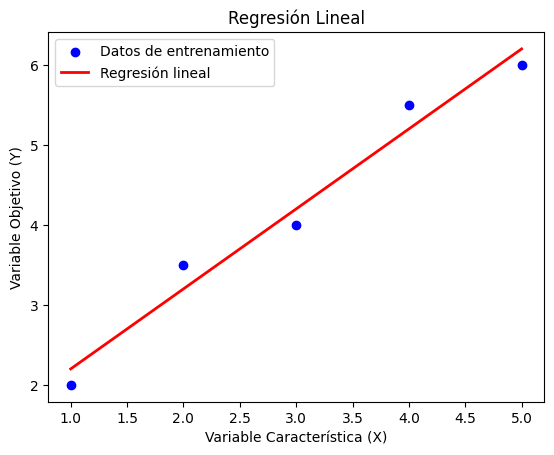

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], y, color='blue', label='Datos de entrenamiento')
plt.plot(X[:, 0], predicciones, color='red', linewidth=2, label='Regresión lineal')

plt.xlabel('Variable Característica (X)')
plt.ylabel('Variable Objetivo (Y)')
plt.title('Regresión Lineal')
plt.legend()

plt.show()


## Caso con más variables independientes.



Tenemos que:
*   Y es un vector columna con las n observaciones de la variable dependiente.
*   X es una matriz con n filas (observaciones) y K columnas (variables independientes).


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import r2_score
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
X = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6]])
y = np.array([2, 3.5, 4, 5.5, 6])

MCRL = LinearRegression()

MCRL.fit(X, y)

print('Coeficiente (pendiente):', MCRL.coef_)
print('Intersección:', MCRL.intercept_)

predicciones = MCRL.predict(X)
print('Predicciones:', predicciones)
print('Ecuación del plano: y = {} * Escolari + {} * Antigüedad + {}'.format(round(MCRL.coef_[0], 3), round(MCRL.coef_[1], 3), round(MCRL.intercept_, 3)))
print ('Coeficiente de determinación: ', round(r2_score(y, MCRL.predict(X)), 3))

Coeficiente (pendiente): [0.5 0.5]
Intersección: 0.6999999999999993
Predicciones: [2.2 3.2 4.2 5.2 6.2]
Ecuación del plano: y = 0.5 * Escolari + 0.5 * Antigüedad + 0.7
Coeficiente de determinación:  0.971


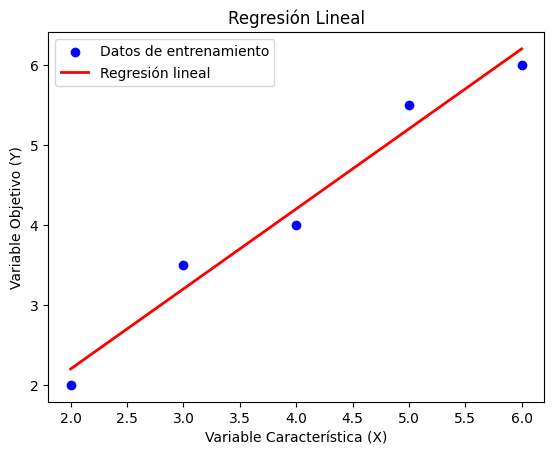

In [ ]:
plt.scatter(X[:, 1], y, color='blue', label='Datos de entrenamiento')
plt.plot(X[:, 1], predicciones, color='red', linewidth=2, label='Regresión lineal')

plt.xlabel('Variable Característica (X)')
plt.ylabel('Variable Objetivo (Y)')
plt.title('Regresión Lineal')
plt.legend()

plt.show()

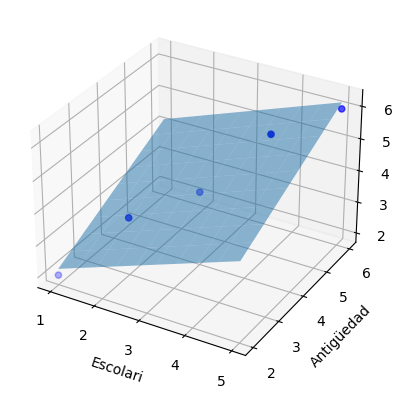

In [ ]:
# Gráfica en 3D
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, color='blue')
# Crear un meshgrid para el plano
x = np.linspace(X[:, 0].min(), X[:, 0].max(), num=10)
y1 = np.linspace(X[:, 1].min(), X[:, 1].max(), num=10)
x, y1 = np.meshgrid(x, y1)
# Calcular los valores z (Autos Producidos) del plano
z = MCRL.intercept_ + MCRL.coef_[0] * x + MCRL.coef_[1] * y1
# Graficar el plano
ax.plot_surface(x, y1, z, alpha=0.5)
ax.set_xlabel("Escolari")
ax.set_ylabel("Antigüedad")
ax.set_zlabel("Ingreso")
plt.show()

# MCO

In [ ]:
import numpy as np
import statsmodels.api as sm

X = np.array([0, 1, 2, 3])
y = np.array([1, 2, 3.5, 4])
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()

In [ ]:
# Predict at x=2.5
X_test = np.array([1, 2.5])
results.get_prediction(X_test).summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,3.675,0.198431,2.821219,4.528781,2.142416,5.207584


In [ ]:
print(results.predict(X))

[1.05 2.1  3.15 4.2 ]


In [ ]:
betas = results.params
print("Coeficientes beta:", betas)

Coeficientes beta: [1.05 1.05]


# Máxima Verosimilitud

In [2]:
import numpy as np
from scipy.optimize import minimize

# Generamos datos de ejemplo de una distribución normal
np.random.seed(0)
mu_true = 2.0
sigma_true = 1.5
sample_size = 100
data = np.random.normal(mu_true, sigma_true, sample_size)

# Definimos la función de verosimilitud para una distribución normal
def likelihood(params, data):
    mu, sigma = params
    n = len(data)
    log_likelihood = -n/2 * np.log(2 * np.pi * sigma**2) - 1/(2 * sigma**2) * np.sum((data - mu)**2)
    print(log_likelihood)
    return -log_likelihood

# Estimamos los parámetros de la distribución normal utilizando MLE
initial_guess = [0, 1]  # Suposición inicial para mu y sigma
result = minimize(likelihood, initial_guess, args=(data,))
print(result)
mu_mle, sigma_mle = result.x

# Imprimimos los parámetros estimados
print("Parámetro mu estimado:", mu_mle)
print("Parámetro sigma estimado:", sigma_mle)

-424.519164998737
-424.51916188482335
-424.5191565758465
-228.57251456685884
-228.5725138833248
-228.57251426027756
-3470.4649495864896
-3470.464961430749
-3470.465047092071
-224.99567430191343
-224.99567363565936
-224.99567402488753
-193.8974969676866
-193.8974974210875
-193.89749633384065
-191.1504484073031
-191.15044805011533
-191.15044838387328
-246.29684495200158
-246.29684631386453
-246.2968422260658
-183.78759810415727
-183.78759801205518
-183.78759801207386
-183.54983467733146
-183.5498346622291
-183.54983455604145
-183.42774045198766
-183.42774043217977
-183.4277403609374
-183.25882401933896
-183.25882400880465
-183.25882398543806
-183.22587021821485
-183.22587021668434
-183.22587021507675
-183.2254996568662
-183.2254996567162
-183.225499656788
-183.2254983653687
-183.2254983653505
-183.2254983653843
-183.22549834248377
-183.22549834248247
-183.22549834248755
-183.2254983420268
-183.22549834202687
-183.22549834202695
  message: Optimization terminated successfully.
  success: 

# MM
1. **Definición**:
   - El método de momentos es una técnica de estimación basada en igualar los momentos teóricos de una distribución (derivados del modelo) con los momentos muestrales (calculados a partir de los datos).

2. **Pasos**:
   1. **Definir Momentos Teóricos**: Determinar los momentos teóricos del modelo en función de los parámetros desconocidos. Por ejemplo, para una distribución normal \( N(\mu, \sigma^2) \), los primeros dos momentos teóricos son la media (\( \mu \)) y la varianza (\( \sigma^2 \)).
   2. **Calcular Momentos Muestrales**: Calcular los momentos correspondientes a partir de los datos observados. La media muestral (\( \bar{x} \)) y la varianza muestral (\( s^2 \)) son ejemplos de momentos muestrales.
   3. **Igualar Momentos**: Igualar los momentos teóricos a los momentos muestrales para obtener un sistema de ecuaciones.
   4. **Resolver el Sistema**: Resolver el sistema de ecuaciones para estimar los parámetros del modelo.

In [ ]:
# Datos generados
np.random.seed(0)
mu_real = 2
sigma_real = 1.5
sample_size = 100
data = np.random.normal(mu_real, sigma_real, sample_size)

# Función para calcular los momentos
def moments(theta, data):
    mu, sigma = theta
    mu_moment = np.mean(data) - mu
    sigma_moment = np.std(data) - sigma
    return np.sum(np.array([mu_moment, sigma_moment])**2)

# Función para estimar los parámetros usando el método de momentos
def estimate_parameters_mm(data):
    initial_guess = [0, 1]  # Adivinanza inicial para mu y sigma
    result = minimize(moments, initial_guess, args=(data,))
    return result.x

# Estimación de parámetros
mu_mm, sigma_mm = estimate_parameters_mm(data)
print("Método de Momentos - Media estimada:", mu_mm)
print("Método de Momentos - Desviación estándar estimada:", sigma_mm)


Método de Momentos - Media estimada: 2.0897119993211746
Método de Momentos - Desviación estándar estimada: 1.5118233717538916


# GMM

1. **Definición**:
   - El método de momentos generalizados (GMM) es una extensión del método de momentos que permite manejar más condiciones momentarias que parámetros a estimar. Es especialmente útil en econometría y otras áreas donde los modelos son más complejos.

2. **Pasos**:
   1. **Especificar Momentos**: Definir un conjunto de momentos (condiciones de momento) que se espera que las variables del modelo cumplan. Estas condiciones se expresan como $ E[g(Z, \theta)] = 0 $ , donde $ Z $ es el vector de datos observados y $ \theta $ es el vector de parámetros a estimar.
   2. **Formar una Función de Discrepancia**: Construir una función de discrepancia basada en los momentos muestrales y teóricos. Esta función mide cuán bien los momentos teóricos se ajustan a los momentos muestrales.
   3. **Minimizar la Función de Discrepancia**: Utilizar técnicas de optimización para encontrar los parámetros que minimizan la función de discrepancia. La función de discrepancia típica es $ J(\theta) = g_n(\theta)' W g_n(\theta) $, donde $ g_n(\theta) $ es el vector de momentos muestrales y $ W $ es una matriz de ponderación.

In [ ]:
# Función para calcular los momentos
def gmm_moments(theta, data):
    mu, sigma = theta
    mu_moment = np.mean(data) - mu
    sigma_moment = (np.std(data) - sigma) / sigma
    return np.sum(np.array([mu_moment, sigma_moment])**2)

# Función para estimar los parámetros usando el método de momentos generalizado (GMM)
def estimate_parameters_gmm(data):
    initial_guess = [0, 1]  # Adivinanza inicial para mu y sigma
    result = minimize(gmm_moments, initial_guess, args=(data,))
    return result.x

# Estimación de parámetros
mu_gmm, sigma_gmm = estimate_parameters_gmm(data)
print("Generalized Method of Moments - Media estimada:", mu_gmm)
print("Generalized Method of Moments - Desviación estándar estimada:", sigma_gmm)

Generalized Method of Moments - Media estimada: 2.0897121198546174
Generalized Method of Moments - Desviación estándar estimada: 1.5118200449647587


El MM se basa en igualar momentos teóricos y muestrales para obtener estimaciones de los parámetros, mientras que el GMM extiende esta idea permitiendo la utilización de múltiples condiciones momentarias y una función de discrepancia ponderada para estimar los parámetros de modelos más complejos.